### 对转录本的ORF进行判断
使用EMBOSS对PacBio转录本的ORF和参考基因组的ORF进行预测，提取预测最长的那个ORF作为当前cDNA的ORF；比较PacBio与参考基因在ORF序列、编码框上的变化分为了以下几类
+ in frame shfit
    + 提前终止
    + later 终止
    + 提前start
    + later start
    + 增加了一部分氨基酸序列
+ unchange ORF
+ frame shift
+ Other

The history saving thread hit an unexpected error (OperationalError('no such table: history')).History will not be written to the database.


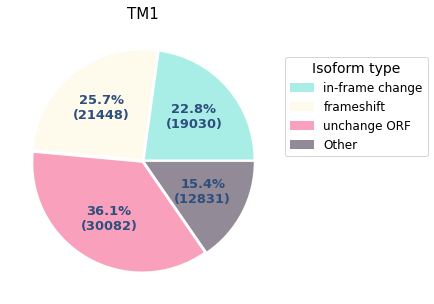

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##画两张饼状图
fig,  ax = plt.subplots(ncols=1,figsize=(5, 5), subplot_kw=dict(aspect="equal"))
Isoform=[
    '19030 in-frame change',
    '21449 frame shift',
    '30082 unchange ORF',
    '12831 Other'
]

###绘制剪切事件的比例
data=[float(x.split()[0]) for x in Isoform]
ingredients=['in-frame change','frameshift','unchange ORF','Other']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts,autotexts= ax.pie(
    data,
    autopct=lambda pct: func(pct, data),
    colors=['#a9eee6','#fefaec','#f9a1bc','#928a97'],
    shadow=False,
    explode=(0.02, 0.02, 0.02,0.02)  ##裂开
)


plt.setp(autotexts, size=13, weight="bold",color='#2e4e7e') ##设置标准的字体大小与颜色

'''
添加图例
'''
ax.legend(wedges, ingredients,
          title="Isoform type",
          loc="center left",
          bbox_to_anchor=(1, 0.2, 0.5, 1),
          fontsize=12,  ##设置图例文字大小
          title_fontsize=14  ##设置图例title大小
         )
ax.set_title('TM1',fontdict={'size':15})   ##设置图片标题

fig.savefig('/public/home/zpliu/work/Alternative/result/Gh_result/CO31_32_result/ORF/PacBio_frameshift.png', dpi=150, bbox_inches="tight")